## Решение задачи регрессии с помощью нейронных сетей

Определение стоимости недвижимости из набора данных Boston Housing

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...).

Свою копию вы сможете изменять и запускать.


#Необходимые ресурсы

In [2]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
#from scipy.misc import toimage
%matplotlib inline

Boston Housing price regression dataset
https://keras.io/api/datasets/boston_housing/

- Образцы содержат 13 атрибутов домов в разных местах пригорода Бостона в конце 1970-х годов.

- Цели (Targets) - это средние значения домов в определенном месте (в тыс. $).

- Сами атрибуты определены на веб-сайте StatLib http://lib.stat.cmu.edu/datasets/boston.


Variables in order:

 - CRIM     per capita crime rate by town
 - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS    proportion of non-retail business acres per town
 - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - NOX      nitric oxides concentration (parts per 10 million)
 - RM       average number of rooms per dwelling
 - AGE      proportion of owner-occupied units built prior to 1940
 - DIS      weighted distances to five Boston employment centres
 - RAD      index of accessibility to radial highways
 - TAX      full-value property-tax rate per $10,000

 - PTRATIO  pupil-teacher ratio by town
 - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 - LSTAT    % lower status of the population
 - MEDV     Median value of owner-occupied homes in $1000's

## Подготовка данных

**Загружаем данные**

In [3]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


**Просмотр данных**

In [4]:
type(x_train)

numpy.ndarray

In [5]:
x_train.shape

(404, 13)

In [6]:
x_test.shape

(102, 13)

In [7]:
x_train[:3]

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        6.14200e+00, 9.17000e+01, 3.97690e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
        7.61000e+00, 1.57000e+01, 6.27000e+00, 2.00000e+00, 3.48000e+02,
        1.47000e+01, 3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.31000e-01,
        4.97000e+00, 1.00000e+02, 1.33250e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.75520e+02, 3.26000e+00]])

In [8]:
y_train[:3]

array([15.2, 42.3, 50. ])

In [9]:
n = 0
print(x_train[n])
print(y_train[n])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


**Нормализация данных**

Вычитаем среднее значение и делим на стандартное отклонение

In [10]:
# Среднее значение для обучающего набора данных
mean = x_train.mean(axis=0)
# Стандартное отклонение для обучающего набора данных
std = x_train.std(axis=0)
x_train -= mean
x_train /= std
x_test -= mean
x_test /= std

In [11]:
print(x_train[n])
print(y_train[n])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
15.2


In [12]:
x_train.shape

(404, 13)

In [13]:
x_train.shape[1]

13

## Создаем нейронную сеть

Выходной слой с одним линейным нейроном - для задачи регрессии функция активации - RELU.

Конфигурация сети из примера - https://www.tensorflow.org/tutorials/keras/basic_regression

In [14]:
from keras.layers import Dropout
from keras.optimizers import SGD, Adam, Adadelta

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))


optimizer = Adam(lr=0.001)
model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

In [15]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

**Компилируем сеть**

Функция ошибки - среднеквадратичное отклонение. Метрика - среднее абсолютное отклонение.

In [16]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

## Обучаем нейронную сеть



In [17]:
history = model.fit(x_train,
                    y_train,
                    epochs=200,
                    validation_split=0.1,
                    verbose=2)

Epoch 1/200
12/12 - 7s - loss: 510.9822 - mae: 20.5733 - val_loss: 341.4095 - val_mae: 17.1282 - 7s/epoch - 606ms/step
Epoch 2/200
12/12 - 0s - loss: 327.5334 - mae: 15.5666 - val_loss: 167.8764 - val_mae: 11.3628 - 78ms/epoch - 6ms/step
Epoch 3/200
12/12 - 0s - loss: 158.5546 - mae: 10.1951 - val_loss: 53.1569 - val_mae: 6.0311 - 63ms/epoch - 5ms/step
Epoch 4/200
12/12 - 0s - loss: 84.1607 - mae: 7.1381 - val_loss: 32.6341 - val_mae: 4.7326 - 64ms/epoch - 5ms/step
Epoch 5/200
12/12 - 0s - loss: 62.8251 - mae: 5.9585 - val_loss: 22.4411 - val_mae: 3.7808 - 64ms/epoch - 5ms/step
Epoch 6/200
12/12 - 0s - loss: 54.2637 - mae: 5.5944 - val_loss: 18.1402 - val_mae: 3.5168 - 86ms/epoch - 7ms/step
Epoch 7/200
12/12 - 0s - loss: 48.2165 - mae: 5.0535 - val_loss: 14.3865 - val_mae: 3.1457 - 63ms/epoch - 5ms/step
Epoch 8/200
12/12 - 0s - loss: 40.4256 - mae: 4.6839 - val_loss: 17.1715 - val_mae: 3.4289 - 68ms/epoch - 6ms/step
Epoch 9/200
12/12 - 0s - loss: 38.1010 - mae: 4.5611 - val_loss: 15.23

## Проверяем работу модели на тестовом наборе данных

In [18]:
scores = model.evaluate(x_test, y_test, verbose=1)

4/4 [==============================] - 0s 4ms/step - loss: 17.3027 - mae: 2.7035


In [19]:
scores

[17.302696228027344, 2.703486204147339]

In [20]:
print("Средняя абсолютная ошибка на тестовых данных:", round(scores[1], 4))

Средняя абсолютная ошибка на тестовых данных: 2.7035


## Визуализация качества обучения

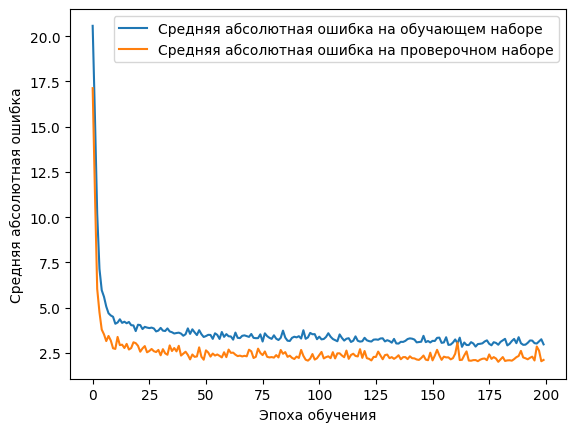

In [21]:
plt.plot(history.history['mae'], # mean_absolute_error
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], # val_mean_absolute_error
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

## Используем модель для предсказаний

**Выполняем предсказание для тестовой выборки**

In [23]:
pred = model.predict(x_test).flatten()

4/4 [==============================] - 0s 2ms/step


In [24]:
print(pred)

[ 7.7754507 17.977398  21.186861  35.330418  24.466187  21.41095
 27.538048  21.450731  18.547876  19.904436  18.379454  16.417187
 14.555896  40.029366  19.546064  21.098038  25.666502  19.851864
 16.81566   25.91528   10.620562  11.9585905 21.214277  16.034712
 19.840765  23.542892  30.800743  28.665802  10.079665  20.502436
 18.752413  14.001596  32.749588  24.088675  16.660378   7.8990183
 15.136545  17.686779  19.143658  25.38618   29.87133   26.47362
 12.763468  41.249992  28.31761   24.081955  26.1303    16.931795
 21.484617  21.603355  34.074635  19.814093   9.827203  13.743186
 33.991188  26.36697   11.371694  45.237457  34.491585  21.986153
 23.186546  15.257661  13.68307   19.204224  22.815409  21.243624
 12.48506   22.193296  12.453945   7.6529293 25.21608   29.784445
 24.497442  11.98989   25.645153  18.228958  19.895374  22.871494
 33.451027   9.369186  20.564667  35.346954  17.05859   13.1701975
 16.677176  18.207748  20.704979  20.94993   21.256897  29.6034
 19.147549  

**Печатаем примеры результатов**

In [25]:
test_index=25
print("Предсказанная стоимость:", pred[test_index], ", правильная стоимость:", y_test[test_index])

Предсказанная стоимость: 23.542892 , правильная стоимость: 23.0


## Визуализируем результаты предсказаний

График предсказаний

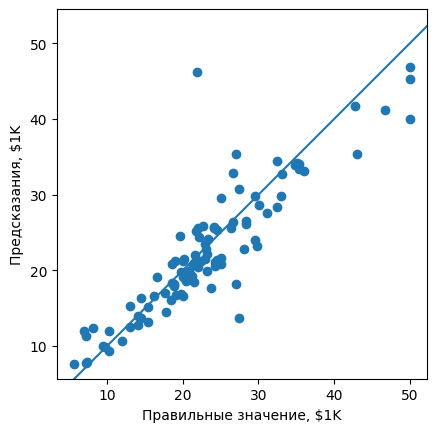

In [26]:
plt.scatter(y_test, pred)
plt.xlabel('Правильные значение, $1K')
plt.ylabel('Предсказания, $1K')
plt.axis('equal')
plt.axis('square')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])
plt.show()

Гистограмма ошибок

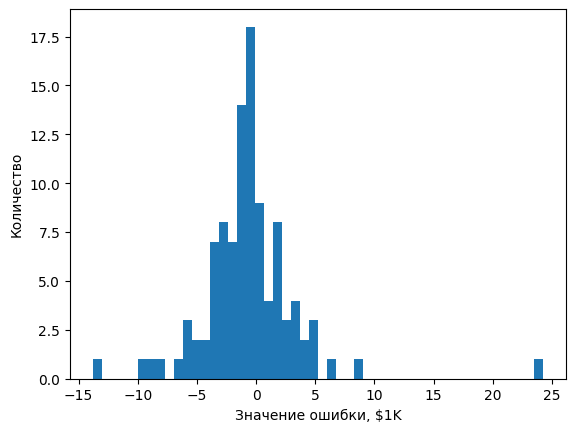

In [27]:
error = pred - y_test
plt.hist(error, bins = 50)
plt.xlabel("Значение ошибки, $1K")
plt.ylabel("Количество")
plt.show()

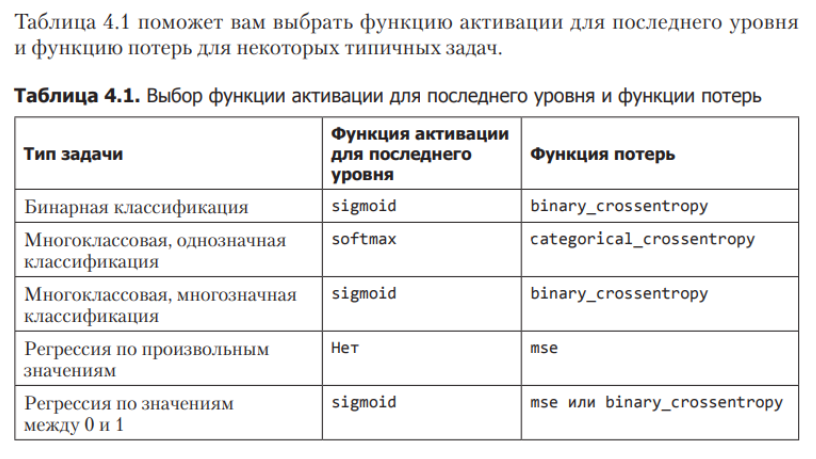

#Средняя абсолютная ошибка (mae)

**mae — mean
absolute error** (средняя абсолютная ошибка) - это абсолютное значение разности
между предсказанными и целевыми значениями (метками).
Как правило, испоьзуется для метрики в задаче регрессии.


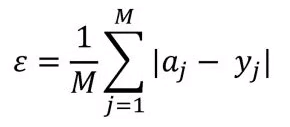

**mse — mean
squared error** (среднеквадратичная ошибка) - это квадрат разности между
предсказанными и целевыми значениями (метками). Как правило, испоьзуется для функции потерь.

# Средняя квадратичная ошибка (mse)

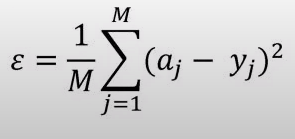

#Регуляризация - борьба с переобучением
Распространенные приемы регуляризации:

- Уменьшение размера сети - количество обучаемых параметров в модели - емкость модели (model capacity)
- Добавление регуляризации весов - уменьшении сложности сети путем ограничения значений ее весовых коэффициентов, что делает их распределение более равномерным
(подробнее читайте: Франсуа Шолле Глава 4 • Основы машинного обучения. 4.4.2. Добавление регуляризации весов)
- Добавление прореживания (dropout) к слою - удаление (присваивании нуля) случайно выбираемым признакам на этапе обучения
- Разделение данных на два набора: обучающий, проверочный
- Слой пакетной нормализации BatchNormalization

#Статьи
Обзор Keras для TensorFlow

https://habr.com/ru/post/482126/


#Задание
- Измените архитектуру нейронной сети:

 - Добавьте/удалите слои;

 - Измените количество нейронов;

- Добавьте дополнительную регуляризацию: Dropout, L2 или L1;

- Используйте разные оптимизаторы ('SGD', 'adam', 'adadelta').


- Изучите блокнот от The TensorFlow Authors

basic-regression.ipynb

https://colab.research.google.com/github/MarkDaoust/models/blob/add-regression-plots/samples/core/tutorials/keras/basic_regression.ipynb

- Изучите раздел 3.6. "Предсказание цен на дома:
пример регрессии" (стр. 111) в книге Ф. Шолле "Глубокое обучение на Python".  
- Сделайте оценку решения методом перекрестной проверки
по K блокам (стр. 114).


- Изучите раздел  4.4.2. Добавление регуляризации весов (стр. 136) в книге Ф. Шолле "Глубокое обучение на Python".